# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Edgardo Medina Miranda

- ID: A01614376

- My carreer: ITC


# Importing libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# PART 1
# Use your assigned dataset

## A1 Load data

In [2]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/NotebooksProfessor/"

else:
    # Define path del proyecto
    Ruta            = ""


Mounted at /content/drive


In [3]:
# Dataset url
url = "datasets/A01614376_X.csv"

# Load the dataset
df = pd.read_csv(Ruta + url)

In [4]:
df

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,0,-3.287282,-3.060829,-1.869189,-3.465401,-11.876297,2.342643,-3.510593,-5.967006,5.895585,7.767587,2.397145
1,1,-0.793300,2.659290,0.185729,-6.680452,-9.337324,0.485302,-2.655384,-9.673184,4.051238,10.665266,6.753881
2,2,-1.764033,-1.442603,1.059537,-6.396648,-8.573797,0.540336,-3.353888,-4.954680,8.999387,7.608970,2.927258
3,3,3.609840,-3.301113,2.039559,-1.769610,9.950443,-7.566445,2.208821,-6.363876,6.051466,-5.957020,-3.192625
4,4,5.136056,-6.280256,2.199694,5.882845,3.169781,5.605888,4.141226,-3.631585,0.586764,-1.802111,-6.679510
...,...,...,...,...,...,...,...,...,...,...,...,...
967,967,8.504300,5.596636,6.952229,-3.884514,6.471843,2.813647,-0.246214,-4.650822,-3.517810,13.068006,-8.024162
968,968,8.343629,8.589866,12.446813,-9.630369,9.242281,6.020589,-4.458338,-7.222783,-2.895477,8.106610,-3.039440
969,969,1.171129,-0.394224,-3.281006,-7.636022,-7.715597,2.738791,-2.873887,-2.192298,5.829501,7.237573,1.972814
970,970,1.001607,-9.457021,1.176521,8.368535,2.764221,3.068055,3.794603,-0.164342,-3.114143,-0.706662,-9.112958


## A2 Data managment


Print the first 7 rows

In [5]:
df.head(7)

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,0,-3.287282,-3.060829,-1.869189,-3.465401,-11.876297,2.342643,-3.510593,-5.967006,5.895585,7.767587,2.397145
1,1,-0.793300,2.659290,0.185729,-6.680452,-9.337324,0.485302,-2.655384,-9.673184,4.051238,10.665266,6.753881
2,2,-1.764033,-1.442603,1.059537,-6.396648,-8.573797,0.540336,-3.353888,-4.954680,8.999387,7.608970,2.927258
3,3,3.609840,-3.301113,2.039559,-1.769610,9.950443,-7.566445,2.208821,-6.363876,6.051466,-5.957020,-3.192625
4,4,5.136056,-6.280256,2.199694,5.882845,3.169781,5.605888,4.141226,-3.631585,0.586764,-1.802111,-6.679510
5,5,1.950752,-0.770857,-4.479027,-8.058870,-8.104962,0.049025,-4.954507,-8.370855,4.246160,7.339535,0.286657
6,6,-4.186893,-0.316999,-0.027019,-0.843190,-9.794435,-0.867611,-2.106604,-8.037934,9.607704,6.901338,4.742722


Print the last 4 rows

In [6]:
df.tail(4)

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
968,968,8.343629,8.589866,12.446813,-9.630369,9.242281,6.020589,-4.458338,-7.222783,-2.895477,8.106610,-3.039440
969,969,1.171129,-0.394224,-3.281006,-7.636022,-7.715597,2.738791,-2.873887,-2.192298,5.829501,7.237573,1.972814
970,970,1.001607,-9.457021,1.176521,8.368535,2.764221,3.068055,3.794603,-0.164342,-3.114143,-0.706662,-9.112958
971,971,-2.914350,-1.220778,-6.112295,-5.440040,-7.513929,-1.033084,-2.578978,-1.589656,6.821635,8.386622,1.258326


How many rows and columns are in your data?

Use the `shape` method


In [7]:
df.shape

(972, 12)

Print the name of all columns

Use the `columns` method

In [8]:
print(df.columns)

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11'],
      dtype='object')


What is the data type in each column

Use the `dtypes` method

In [9]:
df.dtypes

,0
Unnamed: 0,int64
x1,float64
x2,float64
x3,float64
x4,float64
x5,float64
x6,float64
x7,float64
x8,float64
x9,float64


What is the meaning of rows and columns?

In [ ]:
# Your responses here

# 1) Las filas son el numero de entradas validas para el dataset

# 2) Las columnas representan el valor para cada entrada, en este dataset hay 11 valores por mas de 700 entradas

Print a statistical summary of your columns


In [12]:
print(df.describe())

       Unnamed: 0          x1          x2          x3          x4          x5  \
count  972.000000  972.000000  972.000000  972.000000  972.000000  972.000000   
mean   485.500000    3.141192   -1.309120    1.358325   -2.220407    2.118920   
std    280.736531    4.149669    4.542583    4.725104    5.509073    7.391925   
min      0.000000   -7.271063  -10.462860   -8.465191  -13.258306  -14.527134   
25%    242.750000    0.279326   -5.054657   -2.206726   -6.863455   -3.236777   
50%    485.500000    3.002176   -2.108769    0.262809   -3.556540    4.390420   
75%    728.250000    6.108100    2.539314    4.849378    2.425733    7.917793   
max    971.000000   14.129254   10.931673   13.908162   11.483440   15.236460   

               x6          x7          x8          x9         x10         x11  
count  972.000000  972.000000  972.000000  972.000000  972.000000  972.000000  
mean     0.420868   -0.572977   -5.126926    1.600513    3.441834   -2.310352  
std      5.898735    3.100740 

In [13]:
# 1) What is the minumum and maximum values of each variable
min = df.min()
max = df.max()

print("Valor minimo de cada columna:")
print(min)

print("\nValor maximo de cada columna:")
print(max)

# 2) What is the mean and standard deviation of each variable
mean_values = df.mean()
std_values = df.std()

print("Valor promedio de cada columna:")
print(mean_values)

print("Desviacion estandar de cada columna:")
print(std_values)

# 3) What the 25%, 50% and 75% represent?
    Son los cuartiles y sirven para represengt los percentiles de los datos

Valor minimo de cada columna:
Unnamed: 0     0.000000
x1            -7.271063
x2           -10.462860
x3            -8.465191
x4           -13.258306
x5           -14.527134
x6           -12.862422
x7            -8.871370
x8           -14.495796
x9            -9.187103
x10           -8.931917
x11          -11.849739
dtype: float64

Valor maximo de cada columna:
Unnamed: 0    971.000000
x1             14.129254
x2             10.931673
x3             13.908162
x4             11.483440
x5             15.236460
x6             12.082914
x7              9.543941
x8              4.111513
x9             11.600557
x10            13.825100
x11             8.848134
dtype: float64
Valor promedio de cada columna:
Unnamed: 0    485.500000
x1              3.141192
x2             -1.309120
x3              1.358325
x4             -2.220407
x5              2.118920
x6              0.420868
x7             -0.572977
x8             -5.126926
x9              1.600513
x10             3.441834
x11           

Rename the columns using the same name with capital letters

In [14]:
df.columns = df.columns.str.replace('x', 'X')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,0,-3.287282,-3.060829,-1.869189,-3.465401,-11.876297,2.342643,-3.510593,-5.967006,5.895585,7.767587,2.397145
1,1,-0.793300,2.659290,0.185729,-6.680452,-9.337324,0.485302,-2.655384,-9.673184,4.051238,10.665266,6.753881
2,2,-1.764033,-1.442603,1.059537,-6.396648,-8.573797,0.540336,-3.353888,-4.954680,8.999387,7.608970,2.927258
3,3,3.609840,-3.301113,2.039559,-1.769610,9.950443,-7.566445,2.208821,-6.363876,6.051466,-5.957020,-3.192625
4,4,5.136056,-6.280256,2.199694,5.882845,3.169781,5.605888,4.141226,-3.631585,0.586764,-1.802111,-6.679510


Rename the columns to their original names

In [15]:
df.columns = df.columns.str.replace('X', 'x')
df.head()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,0,-3.287282,-3.060829,-1.869189,-3.465401,-11.876297,2.342643,-3.510593,-5.967006,5.895585,7.767587,2.397145
1,1,-0.793300,2.659290,0.185729,-6.680452,-9.337324,0.485302,-2.655384,-9.673184,4.051238,10.665266,6.753881
2,2,-1.764033,-1.442603,1.059537,-6.396648,-8.573797,0.540336,-3.353888,-4.954680,8.999387,7.608970,2.927258
3,3,3.609840,-3.301113,2.039559,-1.769610,9.950443,-7.566445,2.208821,-6.363876,6.051466,-5.957020,-3.192625
4,4,5.136056,-6.280256,2.199694,5.882845,3.169781,5.605888,4.141226,-3.631585,0.586764,-1.802111,-6.679510


Use two different alternatives to get one of the columns

In [18]:
columnNUM = df.x1
print(columnNUM)

print(df.iloc[:, 5].head(6))

0     -3.287282
1     -0.793300
2     -1.764033
3      3.609840
4      5.136056
         ...   
967    8.504300
968    8.343629
969    1.171129
970    1.001607
971   -2.914350
Name: x1, Length: 972, dtype: float64
0   -11.876297
1    -9.337324
2    -8.573797
3     9.950443
4     3.169781
5    -8.104962
Name: x5, dtype: float64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [21]:
print(df.iloc[10:15, [7,11,1]])

          x7       x11         x1
10 -0.248478  4.277601  -0.737717
11  3.567093 -6.898980  -1.446570
12  5.836541 -5.009529   3.168264
13 -6.482500 -5.179806  11.366136
14 -0.448794 -1.558278   4.474150


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [25]:
total_filas = len(df)

valores_nulos = df.iloc[:, [1, 2]].isna().sum()

valores_no_nulos = df.iloc[:, [1, 2]].notna().sum()

print("Cantidad de valores nulos en las columnas 2 y 3:")
print(valores_nulos)
print("\nCantidad de valores no nulos en las columnas 2 y 3:")
print(valores_no_nulos)

Cantidad de valores nulos en las columnas 2 y 3:
x1    0
x2    0
dtype: int64

Cantidad de valores no nulos en las columnas 2 y 3:
x1    972
x2    972
dtype: int64


Discard the last column


In [24]:
df = df.drop(df.columns[-1], axis=1)
df.head()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,0,-3.287282,-3.060829,-1.869189,-3.465401,-11.876297,2.342643,-3.510593,-5.967006,5.895585,7.767587
1,1,-0.793300,2.659290,0.185729,-6.680452,-9.337324,0.485302,-2.655384,-9.673184,4.051238,10.665266
2,2,-1.764033,-1.442603,1.059537,-6.396648,-8.573797,0.540336,-3.353888,-4.954680,8.999387,7.608970
3,3,3.609840,-3.301113,2.039559,-1.769610,9.950443,-7.566445,2.208821,-6.363876,6.051466,-5.957020
4,4,5.136056,-6.280256,2.199694,5.882845,3.169781,5.605888,4.141226,-3.631585,0.586764,-1.802111


### Questions

Based on the previos results, provide a description of yout dataset

Your response:
The dataset consists of 972 rows and 12 columns, with continuous numerical data in 11 columns (labeled from x1 to x11) and one integer column, likely representing an index. Each column contains floating-point values with no missing data. The dataset appears to capture various numerical features that could represent experimental or observational data points. Given the column names, it's likely that these are unnamed variables measured in a study or simulation. The lack of missing values suggests a complete dataset, making it suitable for further analysis, such as correlations or statistical modeling.




## A3 Data visualization

Plot in the same figure the histogram of two variables



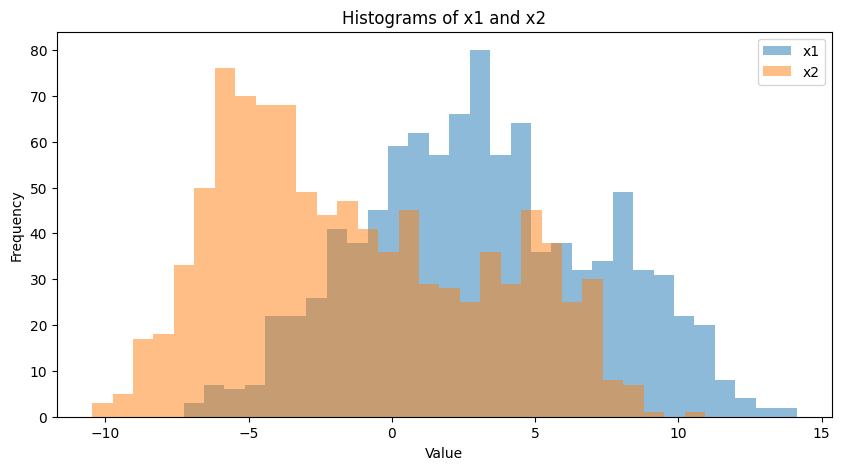

In [26]:
variable_1 = 'x1'
variable_2 = 'x2'

plt.figure(figsize=(10, 5))

plt.hist(df[variable_1], bins=30, alpha=0.5, label=variable_1)

plt.hist(df[variable_2], bins=30, alpha=0.5, label=variable_2)

plt.title(f'Histograms of {variable_1} and {variable_2}')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.legend()

plt.show()



Based on these plots, provide a description of your data:

Your response here: La gráfica muestra las distribuciones de las variables x1 y x2. La variable x1 tiene una distribución más dispersa, lo que sugiere una mayor varianza, mientras que x2 muestra una distribución más concentrada en valores centrales, indicando menor varianza. Esto sugiere que ambas variables capturan aspectos diferentes del conjunto de datos.

Plot in the same figure the boxplot of two variables

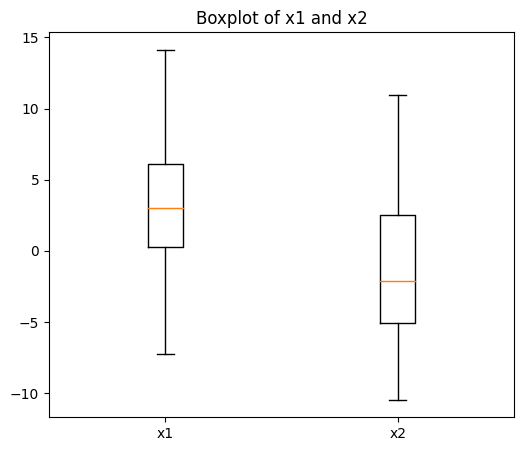

In [27]:
plt.figure(figsize=(6, 5))
plt.boxplot([df[variable_1], df[variable_2]], labels=[variable_1, variable_2])
plt.title('Boxplot of x1 and x2')
plt.show()

Plot the scatter plot of two variables

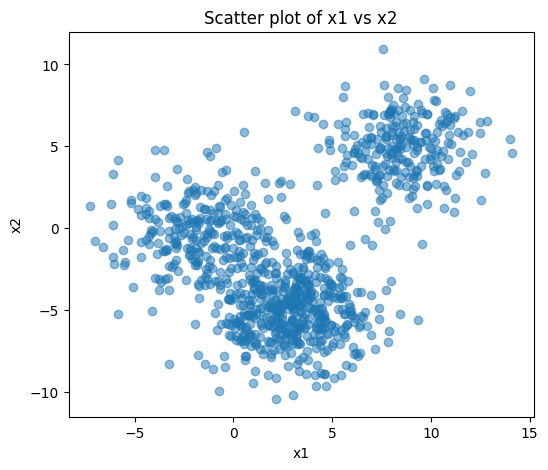

In [28]:
plt.figure(figsize=(6, 5))
plt.scatter(df[variable_1], df[variable_2], alpha=0.5)
plt.title(f'Scatter plot of {variable_1} vs {variable_2}')
plt.xlabel(variable_1)
plt.ylabel(variable_2)
plt.show()

### Questions

Based on the previos plots, provide a description of yout dataset

Your response:
Boxplot: La variable x1 presenta una mayor dispersión que x2, lo que sugiere una mayor variabilidad en sus valores. Ambas variables tienen valores atípicos (outliers), pero x1 parece tener una mayor cantidad y distancia de estos valores con respecto a la mediana.

Scatter plot: La relación entre x1 y x2 no muestra una correlación lineal clara, ya que los puntos están bastante dispersos. Esto sugiere que las dos variables no están directamente relacionadas de forma simple y podrían estar influidas por otros factores del conjunto de datos.

Por lo que, las dos variables analizadas tienen distribuciones bastante diferentes, y la falta de una correlación visible indica que podría ser interesante explorar más variables o realizar análisis adicionales para entender mejor la estructura del conjunto de datos.



## A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


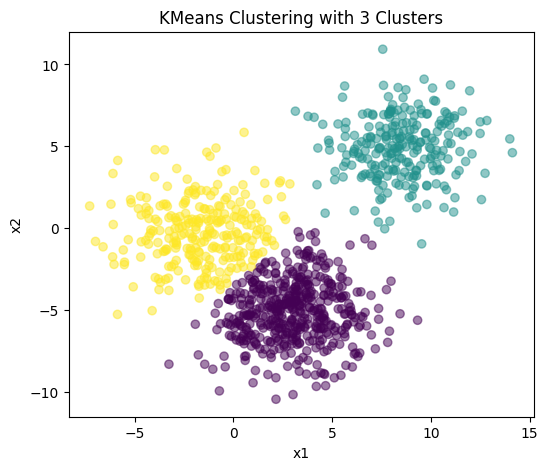

In [38]:
from sklearn.cluster import KMeans

num_clusters = 3
X = df[[variable_1, variable_2]].values

kmeans = KMeans(n_clusters=num_clusters, random_state=0)
df['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(6, 5))
plt.scatter(df[variable_1], df[variable_2], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.title(f'KMeans Clustering with {num_clusters} Clusters')
plt.xlabel(variable_1)
plt.ylabel(variable_2)
plt.show()


Add to your dataset a column with the estimated cluster to each data point

In [46]:
df['ClusterEst'] = kmeans.labels_

print(df.head())

   Unnamed: 0        x1        x2        x3        x4         x5        x6  \
0           0 -3.287282 -3.060829 -1.869189 -3.465401 -11.876297  2.342643   
1           1 -0.793300  2.659290  0.185729 -6.680452  -9.337324  0.485302   
2           2 -1.764033 -1.442603  1.059537 -6.396648  -8.573797  0.540336   
3           3  3.609840 -3.301113  2.039559 -1.769610   9.950443 -7.566445   
4           4  5.136056 -6.280256  2.199694  5.882845   3.169781  5.605888   

         x7        x8        x9        x10  cluster  estimated_cluster  \
0 -3.510593 -5.967006  5.895585   7.767587        2                  2   
1 -2.655384 -9.673184  4.051238  10.665266        2                  2   
2 -3.353888 -4.954680  8.999387   7.608970        2                  2   
3  2.208821 -6.363876  6.051466  -5.957020        0                  0   
4  4.141226 -3.631585  0.586764  -1.802111        0                  0   

   cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  Estimated_Cluster  \
0      

Print the number associated to each cluster

In [47]:
cluster_counts = df['ClusterEst'].value_counts()

cluster_counts

,count
ClusterEst,
0,469
2,260
1,243


Print the centroids

In [48]:
centroids = kmeans.cluster_centers_
centroids

array([[ 3.02577333, -5.13294571],
       [ 8.50135157,  4.92390216],
       [-1.66029663, -0.2370058 ]])

Print the intertia metric

In [49]:
ine = kmeans.inertia_
ine

7177.8633844192245

Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

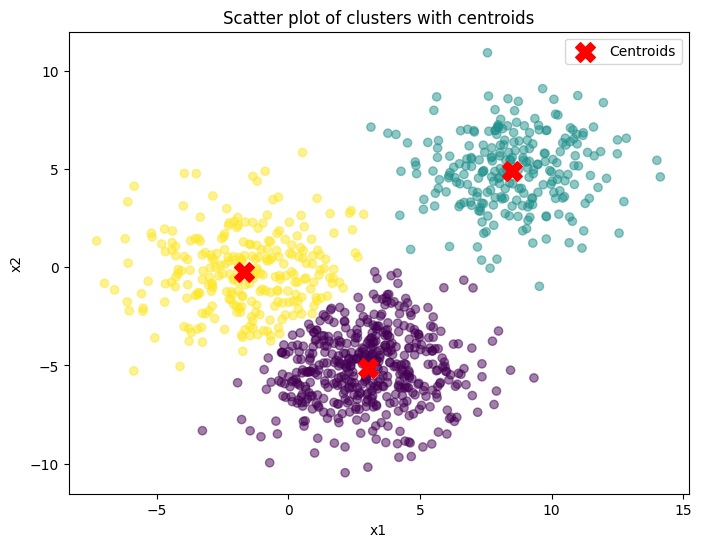

In [50]:
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(df[variable_1], df[variable_2], c=df['cluster'], cmap='viridis', alpha=0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.title('Scatter plot of clusters with centroids')
plt.xlabel(variable_1)
plt.ylabel(variable_2)
plt.legend()
plt.show()

### Questions

Provides a detailed description of your results

Your response: El clustering ha sido efectivo para agrupar los datos en tres grupos diferenciados basados en las variables x1 y x2. Sin embargo, la forma en que los datos se agrupan podría sugerir la existencia de subgrupos adicionales o ruido, por lo que podría ser interesante realizar un análisis más profundo, como ajustar el número de clusters o investigar otros algoritmos de clustering para comparar los resultados.

## A5 Elbow plot

Compute the Elbow plot

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

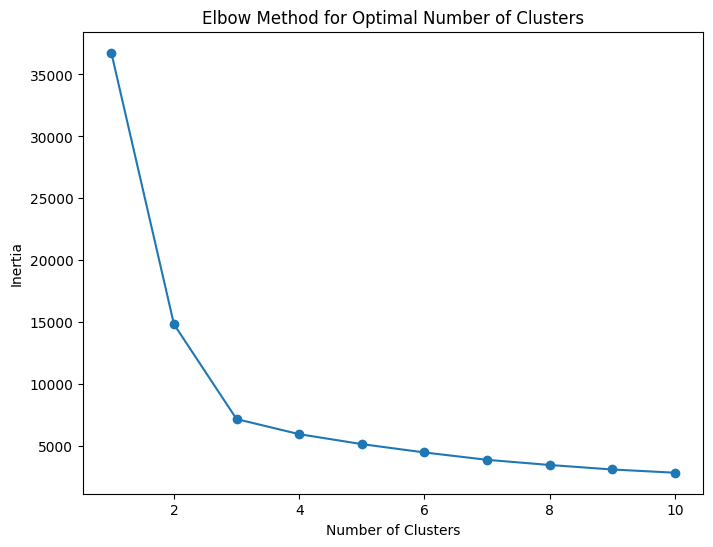

In [51]:
# Elbow method to determine the optimal number of clusters
inertia = []
cluster_range = range(1, 11)

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow plot
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


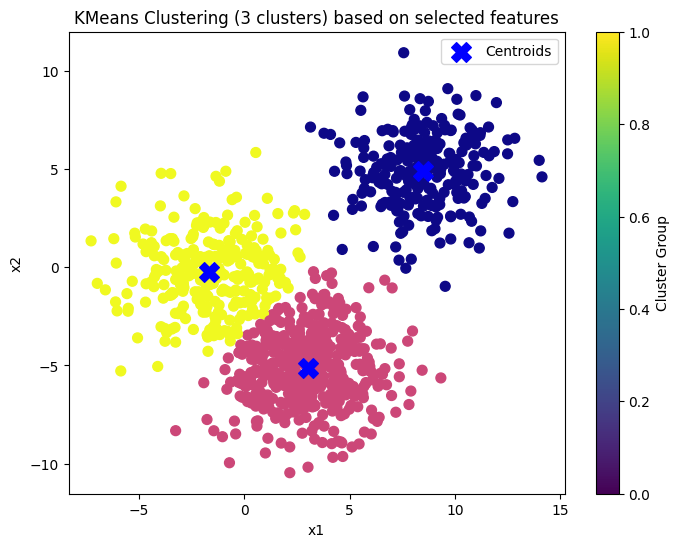

In [52]:
updated_df = df.drop(['cluster'], axis=1)
kmeans_model = KMeans(n_clusters=3, random_state=42)
updated_df['cluster_group'] = kmeans_model.fit_predict(updated_df[['x1', 'x2']])

cluster_centroids = kmeans_model.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(updated_df['x1'], updated_df['x2'], c=updated_df['cluster_group'], cmap='plasma', s=50)
plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], c='blue', s=200, marker='X', label='Centroids')
plt.title('KMeans Clustering (3 clusters) based on selected features')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='Cluster Group')
plt.legend()
plt.show()

### Questions

What is the best number of clusters K? (argue your response)

Your response: El mejor número de clusters K puede determinarse a partir del Elbow plot, donde se observa una disminución notable en la inercia a medida que aumenta el número de clusters. En el Elbow plot anterior, el punto clave parece ubicarse en K=3 o K=4, ya que a partir de esos puntos la inercia comienza a disminuir de manera menos pronunciada. Este "codo" indica el número óptimo de clusters, donde se logra un buen equilibrio entre la cantidad de clusters y la separación de los datos.


Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response: Mi suposición inicial fue utilizar K=3 clusters, lo cual parece coincidir con los resultados del Elbow plot. La estructura de los datos sugiere que tres clusters capturan adecuadamente la variabilidad en las dos primeras dimensiones (x1 y x2). Sin embargo, K=4 también podría ser una opción razonable, lo que sugiere que puede haber subestructuras adicionales dentro de los datos que no se capturan completamente con tres clusters.



# PART 2
# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta: Mi nivel de interpretación de interacciones entre variables relevantes es adecuado, ya que puedo analizar cómo las variables se relacionan y afectan el comportamiento de un fenómeno específico. A partir de estas interacciones, puedo construir modelos bivariados que reproducen con precisión la respuesta del fenómeno investigado, lo que facilita la predicción y comprensión de su comportamiento en diferentes escenarios.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta: Mi nivel de construcción de modelos bivariados es satisfactorio, ya que soy capaz de seleccionar variables clave y desarrollar modelos que expliquen el comportamiento de un fenómeno. Utilizo herramientas estadísticas y análisis de datos para capturar las interacciones entre las variables, logrando representar de manera efectiva la realidad observada y permitiendo realizar predicciones y tomar decisiones basadas en los resultados del modelo.